In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Assuming your DataFrame is called cts and has gene expression data
# Assuming cts is a pandas DataFrame with gene expression data
cts = pd.read_csv("batch_correction/platform_discression/trainign_dataset_51280_microarray_unadjusted.csv")
# Step 1: Prepare your data
 # Assuming your data is already preprocessed and ready for clustering

cts

,Sample,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,...,NM_014348,NM_144983,NM_153708,NM_145270,NM_152315,NM_173652,NM_005361,NM_152426,NM_145179,NM_153264
0,GSM342608,870.599976,500.399994,165.000000,900.900024,67.400002,346.600006,255.300003,58.000000,70.800003,...,53.500000,153.0000,10.800000,45.099998,190.300003,16.299999,11.50000,354.799988,367.399994,49.900002
1,GSM342609,1635.300049,390.899994,252.199997,795.000000,108.300003,623.000000,260.500000,76.400002,4.200000,...,72.500000,10.3000,5.400000,39.299999,5.600000,10.000000,4.00000,187.800003,137.399994,56.299999
2,GSM342610,1006.799988,383.200012,198.199997,924.000000,129.399994,649.599976,192.800003,40.700001,16.200001,...,13.600000,9.9000,86.599998,62.799999,244.600006,21.100000,72.50000,321.200012,262.799988,8.200000
3,GSM342611,1215.800049,496.200012,160.600006,500.899994,18.799999,345.299988,257.600006,23.400000,41.500000,...,104.300003,80.0000,10.700000,155.500000,220.199997,34.700001,7.50000,199.500000,136.399994,3.200000
4,GSM342614,823.599976,561.500000,305.500000,1214.099976,81.300003,494.399994,208.199997,63.799999,79.199997,...,22.500000,21.9000,12.600000,360.799988,241.199997,10.500000,13.90000,369.200012,394.200012,64.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,GSM244612,1316.250000,1582.450000,11268.600000,7065.080000,6376.640000,1996.200000,10128.300000,7015.010000,235.884000,...,927.733000,22.1213,42.814000,162.339000,228.148000,4.295510,11.11980,32.448000,6.087510,8.622890
773,GSM244613,966.504000,889.863000,9753.840000,4753.410000,6072.460000,1229.210000,6264.000000,5658.760000,335.332000,...,727.237000,17.5651,36.656800,86.448100,224.625000,4.371310,8.73054,24.315500,5.876050,8.995580
774,GSM244614,1382.900000,1278.390000,11248.800000,7119.220000,6891.120000,1431.700000,8131.630000,6416.350000,432.760000,...,980.783000,31.8890,27.740000,102.149000,286.438000,4.378150,11.22040,24.645100,5.911190,11.306700
775,GSM244615,1498.540000,1276.440000,10965.900000,6940.470000,7879.880000,1917.330000,7469.210000,6153.410000,440.064000,...,1256.710000,21.9135,12.172600,45.290300,219.131000,4.190670,10.57300,39.559400,5.674820,9.218280


In [18]:
metadata =  pd.read_csv("batch_correction/platform_discression/Samples_age_class.csv")
metadata

,Age,Years,Sex,Geo_accession,Experiment,Status,Average,Practical_age/SDV,PracticalAge_group,Unnamed: 9,Base-Control-Healty,Exclude,Include,Sex.1,Age_sex
0,45.3�2.5,45.3�2.5,unknow,GSM342683,GSE13070,NRd,45.3,2.5,45.51,MiddleAge,1.0,NaN,NaN,unknow,MiddleAge-unknow
1,45.3�2.5,45.3�2.5,unknow,GSM342689,GSE13070,NRd,45.3,2.5,43.39,MiddleAge,1.0,NaN,NaN,Male,MiddleAge-Male
2,45.3�2.5,45.3�2.5,unknow,GSM342690,GSE13070,NRd,45.3,2.5,43.37,MiddleAge,1.0,NaN,NaN,Male,MiddleAge-Male
3,45.3�2.5,45.3�2.5,unknow,GSM342695,GSE13070,NRd,45.3,2.5,44.40,MiddleAge,1.0,NaN,NaN,Male,MiddleAge-Male
4,45.3�2.5,45.3�2.5,unknow,GSM342696,GSE13070,NRd,45.3,2.5,42.45,MiddleAge,1.0,NaN,NaN,Male,MiddleAge-Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,73.5,73.5,Male,GSM244597,GSE9676,NaN,NaN,73.5,73.50,Old,1.0,NaN,NaN,Male,Old-Male
1169,74.5,74.5,Male,GSM244539,GSE9676,NaN,NaN,74.5,74.50,Old,1.0,NaN,NaN,Male,Old-Male
1170,74.5,74.5,Male,GSM244599,GSE9676,NaN,NaN,74.5,74.50,Old,1.0,NaN,NaN,Male,Old-Male
1171,75.1,75.1,Male,GSM244541,GSE9676,NaN,NaN,75.1,75.10,Old,1.0,NaN,NaN,Male,Old-Male


In [25]:
sample_order = cts["Sample"].tolist()  # Get the order of samples in cts


In [ ]:
experiment_order = []  # Store the corresponding experiment for each sample
for sample in sample_order:
    experiment = metadata.loc[metadata['Geo_accession'] == sample, 'Experiment'].values[0]
    experiment_order.append(experiment)
experiment_order

In [31]:
# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}

# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]


In [54]:
list(category_map.keys())

dict_keys(['GSE13070', 'GSE1428', 'GSE161643', 'GSE38718', 'GSE40551', 'GSE47969', 'GSE48278', 'GSE59880', 'GSE6348', 'GSE674_2', 'GSE8157', 'GSE87105', 'GSE9103', 'GSE9676'])

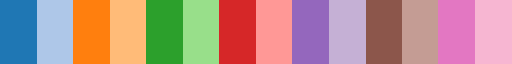

In [35]:

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)
custom_cmap

In [27]:
cts = cts.set_index("Sample")

cts.fillna(0, inplace=True)
cts

,U48705,M87338,X51757,X69699,L36861,L13852,X55005,X79510,M21121,J02843,...,NM_014348,NM_144983,NM_153708,NM_145270,NM_152315,NM_173652,NM_005361,NM_152426,NM_145179,NM_153264
Sample,,,,,,,,,,,,,,,,,,,,,
GSM342608,870.599976,500.399994,165.000000,900.900024,67.400002,346.600006,255.300003,58.000000,70.800003,168.000000,...,53.500000,153.0000,10.800000,45.099998,190.300003,16.299999,11.50000,354.799988,367.399994,49.900002
GSM342609,1635.300049,390.899994,252.199997,795.000000,108.300003,623.000000,260.500000,76.400002,4.200000,191.600006,...,72.500000,10.3000,5.400000,39.299999,5.600000,10.000000,4.00000,187.800003,137.399994,56.299999
GSM342610,1006.799988,383.200012,198.199997,924.000000,129.399994,649.599976,192.800003,40.700001,16.200001,65.500000,...,13.600000,9.9000,86.599998,62.799999,244.600006,21.100000,72.50000,321.200012,262.799988,8.200000
GSM342611,1215.800049,496.200012,160.600006,500.899994,18.799999,345.299988,257.600006,23.400000,41.500000,127.199997,...,104.300003,80.0000,10.700000,155.500000,220.199997,34.700001,7.50000,199.500000,136.399994,3.200000
GSM342614,823.599976,561.500000,305.500000,1214.099976,81.300003,494.399994,208.199997,63.799999,79.199997,145.000000,...,22.500000,21.9000,12.600000,360.799988,241.199997,10.500000,13.90000,369.200012,394.200012,64.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM244612,1316.250000,1582.450000,11268.600000,7065.080000,6376.640000,1996.200000,10128.300000,7015.010000,235.884000,2498.700000,...,927.733000,22.1213,42.814000,162.339000,228.148000,4.295510,11.11980,32.448000,6.087510,8.622890
GSM244613,966.504000,889.863000,9753.840000,4753.410000,6072.460000,1229.210000,6264.000000,5658.760000,335.332000,1764.670000,...,727.237000,17.5651,36.656800,86.448100,224.625000,4.371310,8.73054,24.315500,5.876050,8.995580
GSM244614,1382.900000,1278.390000,11248.800000,7119.220000,6891.120000,1431.700000,8131.630000,6416.350000,432.760000,2197.460000,...,980.783000,31.8890,27.740000,102.149000,286.438000,4.378150,11.22040,24.645100,5.911190,11.306700


In [38]:
X = cts.values 
# Step 2: Perform spectral clustering
n_clusters = 3  # You can adjust this according to your data
sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
clusters = sc.fit_predict(X)



/home/karen/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


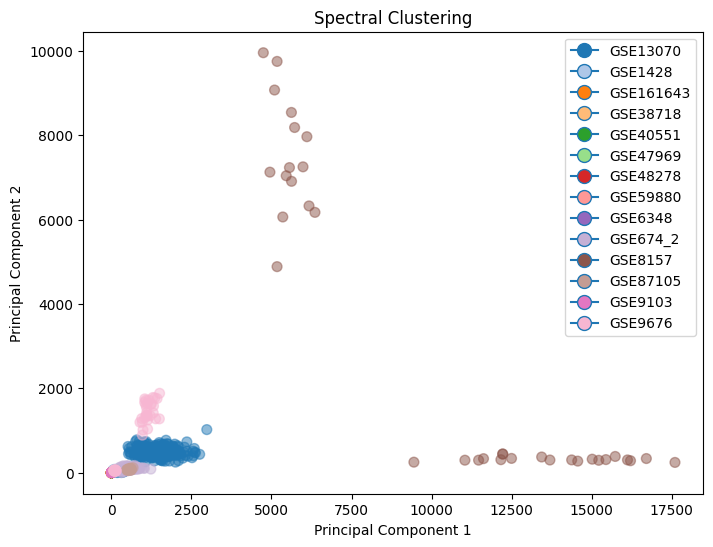

In [59]:
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('Spectral Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
plt.show()